In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 15})

<h1>E12 Schwingkreise </h1>

<h2>Aufgabe 1: Serienschwingkreis</h2>
Messen Sie die frequenzabhängige Stromaufnahme eines RLC-Serienresonanzkreises für zwei verschiedene Dämpfungswiderstände Rd in einem Frequenzbereich um die Resonanzfrequenz f0.

In [14]:
ft = np.linspace(2000,16500,1000)
f = np.array([2000,3000,4000,5000,6000,7000,7200,7500,8500,9500,10500,11500,12500,13500])
U1 = np.array([64.32,94.61, 120.3,142.7,148.4, 147.7, 145.3,143.1,134.1,123.4,114.5,105.5,96.57,92.39])*10**-3
U2 = np.array([32.44,51.04,72.61,93.29,105.5,107.3,103.9,100.1,88.79,77.11,69.01,62.72, 57.33,51.04])*10**-3

U0 = np.max(U1)
U02 =np.max(U2)

UV1 = U1/U0
UV2 = U2/U02

<h2>Aufgabe 2: Auswertung Serienschwingkreis:</h2>
a. Zeichnen Sie die Resonanzkurven. <br>
b. Bestimmen Sie aus den Halbwertsbreiten die jeweiligen Dämpfungskonstanten δ und Güten Q. <br>
c. Fitten Sie die Modellfunktion an die gemessenen Resonanzkurven und bestimmen Sie f0 und δ <br>
d. Vergleichen Sie die Werte von δ mit den aus Rσ/2L berechneten Werten. <br>
e. Ermitteln Sie die Kapazität des Kondensators mit der Thomson-Gleichung. <br>

<h3>Zeichnen Sie die Resonanzkurven </h3>

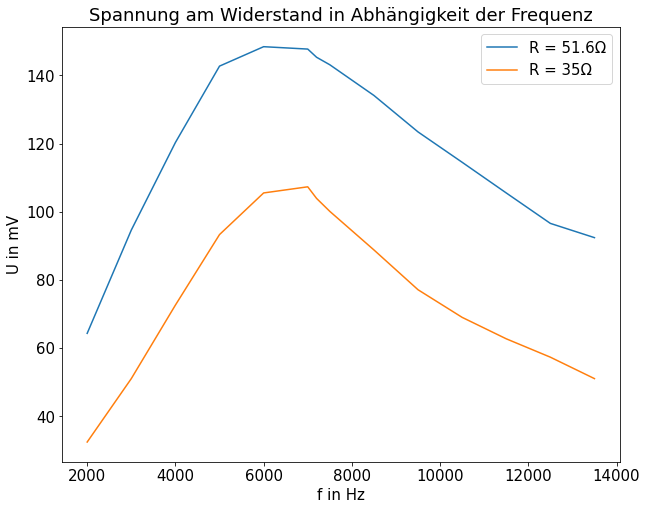

In [15]:
plt.plot(f,U1*10**3, label="R = 51.6Ω")
plt.plot(f,U2*10**3, label="R = 35Ω")
plt.xlabel("f in Hz")
plt.ylabel("U in mV")
plt.title("Spannung am Widerstand in Abhängigkeit der Frequenz")
plt.legend()
plt.show()

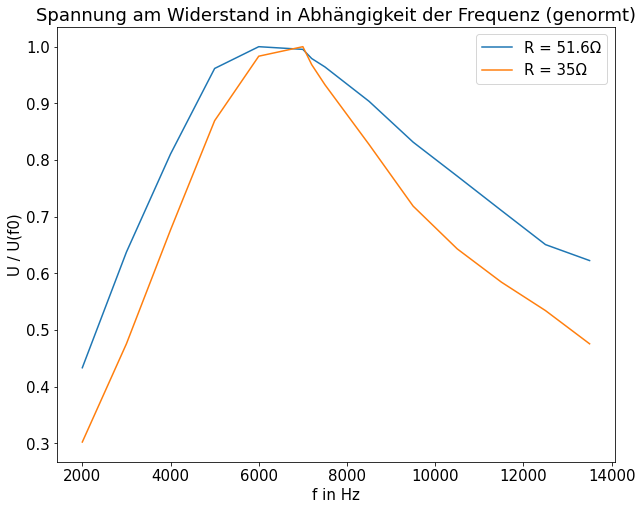

In [16]:
plt.plot(f,UV1, label="R = 51.6Ω")
plt.plot(f,UV2, label="R = 35Ω")
plt.xlabel("f in Hz")
plt.ylabel("U / U(f0)")
plt.title("Spannung am Widerstand in Abhängigkeit der Frequenz (genormt)")
plt.legend()
plt.show()

<h3>Bestimmen Sie aus den Halbwertsbreiten die jeweiligen Dämpfungskonstanten δ und Güten Q.</h3>

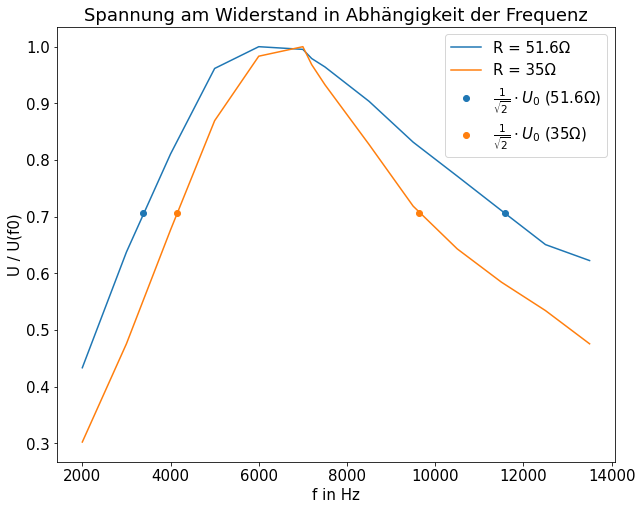

In [17]:
f1 = [3372, 11580]
f2 = [4143, 9630]
g = [1/np.sqrt(2), 1/np.sqrt(2)]
plt.plot(f,UV1, label="R = 51.6Ω")
plt.plot(f,UV2, label="R = 35Ω")
plt.scatter(f1, g, label=r"$\frac{1}{\sqrt{2}} \cdot U_0 $ (51.6Ω)")
plt.scatter(f2, g, label= r"$\frac{1}{\sqrt{2}} \cdot U_0 $ (35Ω)")
plt.xlabel("f in Hz")
plt.ylabel("U / U(f0)")
plt.title("Spannung am Widerstand in Abhängigkeit der Frequenz")
plt.legend()
plt.show()

Damit ergeben sich folgende Halbwertszeiten: $\Delta f$:

In [18]:
df1 = f1[1]-f1[0]
df2 = f2[1]-f2[0]
print(f"Δf1 = {df1}Hz")
print(f"Δf2 = {df2}Hz")

Δf1 = 8208Hz
Δf2 = 5487Hz


Für die experimentell bestimmte Dämpfungskonstante $\delta *$ ergibt sich mit $\delta * = \pi \cdot \Delta f$

In [19]:
d1 = np.pi * df1
d2 = np.pi * df2
print(f"𝛿*1={np.round(d1)}")
print(f"𝛿*2={np.round(d2)}")

𝛿*1=25786.0
𝛿*2=17238.0


(Die Resonanzfrequenz liegt bei $6303Hz$. Damit ergeben sich folgende Güten:
$Q_1=0.7679$
$Q_2=1.1487$

<h3>Fitten Sie die Modellfunktion an die gemessenen Resonanzkurven und bestimmen Sie f0 und δ</h3>

R = 56.48Ω
C = 598.0nF
L = 1.09mH
f = 6238.0Hz


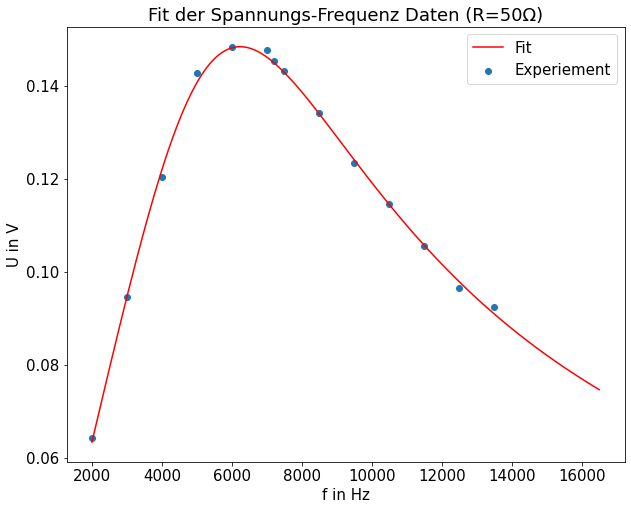

In [20]:
def function(f, R, C, L ):
    return R*U0/np.sqrt(R**2+(2*np.pi*f*L-1/(2*np.pi*f*C))**2)
m, cov = curve_fit(function, f,U1, p0=[51,562e-9,0.001])

R = m[0]
C = m[1]
L = m[2]
p = find_peaks(function(ft,R,C,L))[0]



plt.plot(ft, function(ft,R, C, L), label="Fit", color="red")
plt.scatter(f,U1, label="Experiement")
plt.xlabel("f in Hz")
plt.ylabel("U in V")
plt.title("Fit der Spannungs-Frequenz Daten (R=50Ω)")
plt.legend()

print(f"R = {np.round(R,2)}Ω")
print(f"C = {np.round(C*10**9)}nF")
print(f"L = {np.round(L*10**3,2)}mH")
print(f"f = {np.round(ft[p[0]])}Hz")

R = 39.03Ω
C = 568.0nF
L = 1.1mH
f = 6369.0Hz


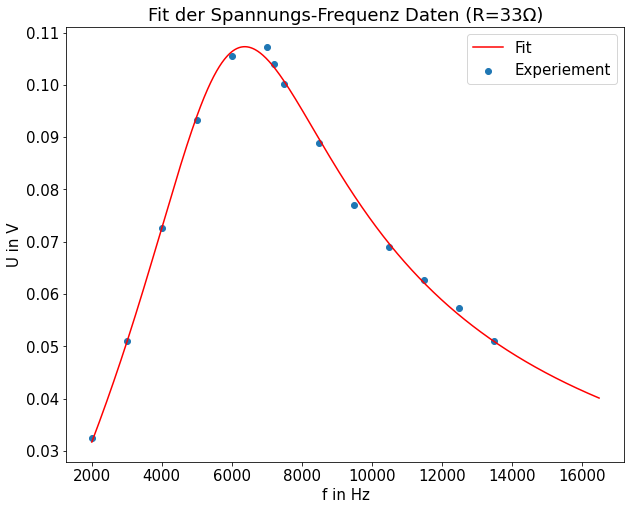

In [21]:
def function(f, R, C, L ):
    return R*U02/np.sqrt(R**2+(2*np.pi*f*L-1/(2*np.pi*f*C))**2)
m, cov = curve_fit(function, f,U2, p0=[35,570e-9,0.001])

R = m[0]
C = m[1]
L = m[2]
p = find_peaks(function(ft,R, C, L))[0][0]

plt.plot(ft, function(ft,R, C, L), label="Fit", color="red")
plt.scatter(f,U2, label="Experiement")
plt.xlabel("f in Hz")
plt.ylabel("U in V")
plt.title("Fit der Spannungs-Frequenz Daten (R=33Ω)")
plt.legend()

print(f"R = {np.round(R,2)}Ω")
print(f"C = {np.round(C*10**9)}nF")
print(f"L = {np.round(L*10**3,2)}mH")
print(f"f = {np.round(ft[p])}Hz")

Mit den Werten aus dem Fit (f = 6303Hz, L = 1.1mH) ergeben sich:<br>
$\delta^*_1=25454$
$\delta^*_2=17727$

<h3>Vergleichen Sie die Werte von δ mit den aus Rσ/2L berechneten Werten.</h3>
Die theoretisch berechneten Werte liegen sehr nach bei den gemessenen Werte.<br>
$\Delta \delta_1^* = 332$ (1.5% Abweichung)<br>
$\Delta \delta_2^* =490$ (3% Abweichung)<br>
Diese kommen vermutlich durch das allgemeine Rauschen.

<h3>Ermitteln Sie die Kapazität des Kondensators mit der Thomson-Gleichung.</h3>
Aus der Thomson Gleichung folgt  mit (L=1mH, f=6303Hz):
$C=\dfrac{1}{4 \pi^2 L f_0^2} = 637nF$

<h2>Aufgabe 3: Parallelschwingkreis</h2>
Messen Sie die frequenzabhängige Stromaufnahme eines Schaltkreises, in dem
Kondensator und Spule parallel geschaltet sind, und in Reihe zum Widerstand R liegen.

In [22]:
f = np.array([2000,3000,4000,5000,6000,7000,7200,7500,8500,9500,10500,11500,12500,13500])
Ur = np.array([88.12,77.54,60.67,37.99,12.9,15.98,20.38, 26.11,42.39, 55.82, 63.67, 70.56, 75.23, 79.98])*10**-3
Ug = np.average([100.1,100.1,102,100.1,100.1,100.1,100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 102.5])*10**-3

<h2>Aufgabe 4: Auswertung Parallelschwingkreis</h2>
a. Leiten Sie einen Ausdruck für die Impedanz des Parallelschwingkreises her.<br>
b. Fitten Sie die Modellkurve an die gemessenen Daten. Bestimmen Sie daraus L, C, Rsp und R sowie die
Resonanzfrequenz f0.<br>
c. Vergleichen Sie die Resonanzfrequenz mit dem in Aufgabe 2 ermittelten Wert.

<h3>Leiten Sie einen Ausdruck für die Impedanz des Parallelschwingkreises her.</h3>
Für einzelnen Komponenten gilt:<br>
$
Z_R = R \\
Z_L = R_{Sp} + i \omega L \\
Z_C = \dfrac{1}{i \omega C}
$<br>
Da Spule und Kondensator parallel geschalten sind, gilt für die Gesamtimpedanz des Parallelteils:<br>
$
Z_P = \left( \dfrac{1}{Z_L}+ \dfrac{1}{Z_C} \right)^{-1} = \left( \dfrac{1}{R_{Sp} + i \omega L} + i \omega C \right)^{-1}
$<br>
Somit gilt für die Gesamtimpedanz:
$
Z_{Ges} = Z_P + Z_R = \left( \dfrac{1}{R_{Sp} + i \omega L} + i \omega C \right)^{-1} + R
$


<h3>Fitten Sie die Modellkurve an die gemessenen Daten. Bestimmen Sie daraus L, C, Rsp und R sowie die
Resonanzfrequenz f0.</h3>

In [23]:
def function2(f, R, Rsp, C, L):
    z = (1/(1j*2*np.pi*f*L+Rsp)+1j*2*np.pi*f*C)**-1+R
    return R/np.absolute(z) * Ug

R = 31.7Ω
R_Sp = 1.58Ω
C = 652.0nF
L = 0.94mH
f0 = 6412.0Hz


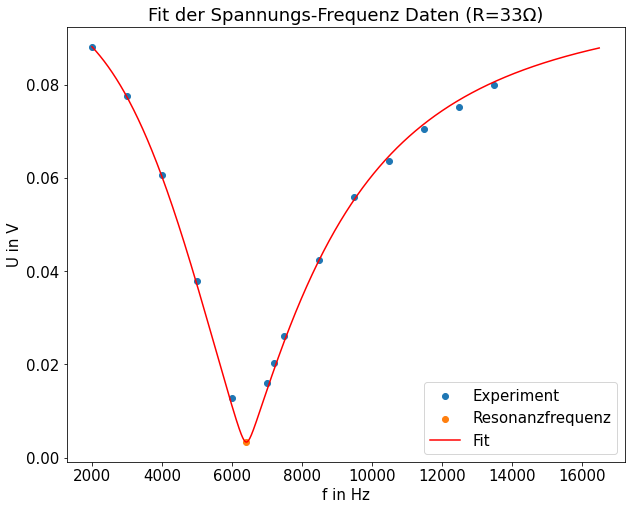

In [24]:
m, cov = curve_fit(function2, f, Ur, p0=[33,1,620e-9,0.001], maxfev=4000)

R = m[0]
Rsp = m[1]
C = m[2]
L = m[3]

Ut = function2(ft, R, Rsp, C, L)
p = find_peaks(-Ut)[0][0]

plt.scatter(f, Ur, label="Experiment")
plt.scatter(ft[p], Ut[p], label="Resonanzfrequenz")
plt.plot(ft, Ut, label="Fit", color="red")
plt.xlabel("f in Hz")
plt.ylabel("U in V")
plt.title("Fit der Spannungs-Frequenz Daten (R=33Ω)")
plt.legend()

print(f"R = {np.round(R,2)}Ω")
print(f"R_Sp = {np.round(Rsp,2)}Ω")
print(f"C = {np.round(C*10**9)}nF")
print(f"L = {np.round(L*10**3,2)}mH")
print(f"f0 = {np.round(ft[p])}Hz")


<h3>Vergleichen Sie die Resonanzfrequenz mit dem in Aufgabe 2 ermittelten Wert.</h3>
Die Werte stimmen fast überein. Die Abweichung beträgt nur etwa 2%. Dies ist auch theoretisch der Fall, da bei beiden Resonanzfrequenzen die Blindwiderstände gegen null gehen. Die Annahme stimmt jedoch nur unter der Bedingung, dass der Spulenwiderstand vernachlässigbar ist.
Für den Parallelkreis gilt dann:<br>
$\dfrac{1}{i \omega L} + i \omega C = 0$<br>
Für die Reihenschaltung gilt:<br>
$ i \omega L + \dfrac{1}{i \omega C} = 0$<b0>
Diese Aussagen sind equivalent.<br>
Die Abweichung kann also vom Spulenwiderstand kommen.